In [1]:
# This notebook could not have been done without the help from Adrian of PyImage and Aurelien geron

In [2]:
# import os
# os.getcwd()

In [3]:
# import pandas as pd
# def save_fer_img():
#     fer_data=pd.read_csv('fer2013.csv',delimiter=',')
#     for index,row in fer_data.iterrows():
#         pixels=np.asarray(list(row['pixels'].split(' ')),dtype=np.uint8)
#         classes=np.asarray((row['emotion']),dtype=np.uint8)
#         img=pixels.reshape((48,48))
#         pathname=os.path.join(os.getcwd() + '\\dataset\\'+ str(classes) + "\\" + str(index) + r'.jpg')
#         cv2.imwrite(pathname,img)
#         print('image saved: {}'.format(pathname))

In [4]:
# save_fer_img()

In [5]:
# Everything above needs to be done only once,

In [6]:
# After tons of trying, I learned that transfer learning will not work with small images, i.e., 48 x 48. This is because they
# were trained on 224x224x3, 229x229x3 etc. That is why if I load the weights 'imagenet', they generally won't work well. 

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [8]:
gpus= tf.config.experimental.list_physical_devices('GPU')

In [9]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
tf.config.experimental.set_memory_growth(gpus[0], True)

In [11]:
# First check if GPU is enabled
print(tf.test.is_gpu_available())
print(tf.test.is_built_with_cuda())

True
True


In [12]:
INIT_LR = 1e-4
EPOCHS = 100000
BS = 32

In [13]:
imagePaths = list(paths.list_images("C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset"))
data = []
labels = []

In [14]:
img_to_array(load_img(imagePaths[0])).shape

(48, 48, 3)

In [15]:
print(len(imagePaths))
imagePaths

35887


['C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\0.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\1.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\10.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\10002.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\10016.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\10037.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\10038.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\10052.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\10057.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\10063.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\E

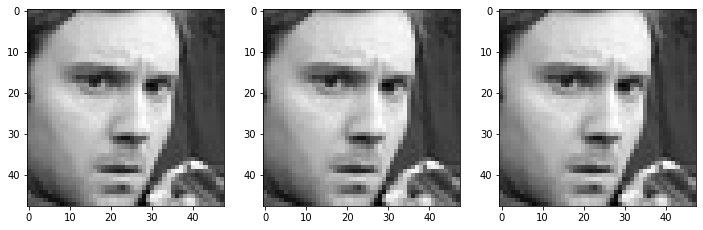

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(img_to_array(load_img(imagePaths[0]))[:,:,0].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(1, 3, 2)
plt.imshow(img_to_array(load_img(imagePaths[0]))[:,:,1].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(1, 3, 3)
plt.imshow(img_to_array(load_img(imagePaths[0]))[:,:,2].reshape(48,48), cmap=plt.cm.gray)
plt.show()

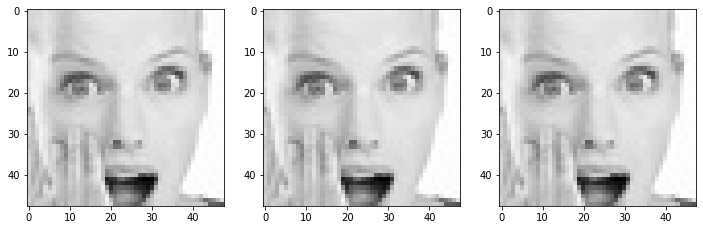

In [17]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(img_to_array(load_img(imagePaths[35886]))[:,:,0].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(1, 3, 2)
plt.imshow(img_to_array(load_img(imagePaths[35886]))[:,:,1].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(1, 3, 3)
plt.imshow(img_to_array(load_img(imagePaths[35886]))[:,:,2].reshape(48,48), cmap=plt.cm.gray)
plt.show()

In [18]:
# As you can see above, the images have three channels but the three channels are the same. Hence, no additional information is
# given to us. Therefore, we will only take one channel and reshape them to (48,48). Note (48,48) is the height and width of the
# images

In [19]:
img_to_array(load_img(imagePaths[2]))[:,:,1].reshape(48,48)

array([[ 29.,  25.,  21., ...,  38.,  45.,  37.],
       [ 31.,  24.,  20., ...,  36.,  36.,  40.],
       [ 28.,  21.,  21., ...,  35.,  32.,  40.],
       ...,
       [ 28.,  29.,  26., ..., 118., 137., 148.],
       [ 30.,  30.,  26., ..., 151., 158., 164.],
       [ 32.,  30.,  27., ..., 174., 173., 174.]], dtype=float32)

In [20]:
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]

    # load the input image (48x48) and preprocess it
    image = load_img(imagePath, target_size=(48,48))
    image = img_to_array(image)
    
    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [21]:
labels

array(['Angry', 'Angry', 'Angry', ..., 'Surprise', 'Surprise', 'Surprise'],
      dtype='<U8')

0
4953
5500
10621
19610
25808
31885


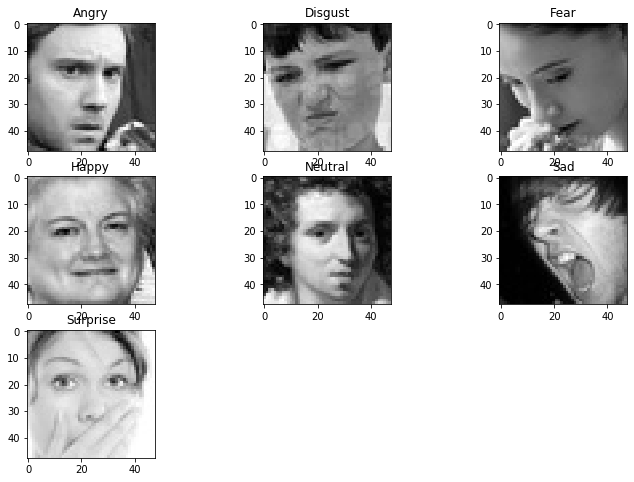

In [22]:
idx0, idx1, idx2, idx3, idx4, idx5, idx6 = 0,0,0,0,0,0,0
for string in labels:
    if string == 'Angry':
        print(idx0)
        break
    idx0 += 1
for string in labels:
    if string == 'Disgust':
        print(idx1)
        break
    idx1 += 1
for string in labels:
    if string == 'Fear':
        print(idx2)
        break
    idx2 += 1
for string in labels:
    if string == 'Happy':
        print(idx3)
        break
    idx3 += 1
for string in labels:
    if string == 'Neutral':
        print(idx4)
        break
    idx4 += 1
for string in labels:
    if string == 'Sad':
        print(idx5)
        break
    idx5 += 1
for string in labels:
    if string == 'Surprise':
        print(idx6)
        break
    idx6 += 1
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
plt.title("Angry")
plt.imshow(img_to_array(load_img(imagePaths[idx0]))[:,:,0].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(3, 3, 2)
plt.title("Disgust")
plt.imshow(img_to_array(load_img(imagePaths[idx1]))[:,:,1].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(3, 3, 3)
plt.title("Fear")
plt.imshow(img_to_array(load_img(imagePaths[idx2]))[:,:,2].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(3, 3, 4)
plt.title("Happy")
plt.imshow(img_to_array(load_img(imagePaths[idx3]))[:,:,0].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(3, 3, 5)
plt.title("Neutral")
plt.imshow(img_to_array(load_img(imagePaths[idx4]))[:,:,1].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(3, 3, 6)
plt.title("Sad")
plt.imshow(img_to_array(load_img(imagePaths[idx5]))[:,:,2].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(3, 3, 7)
plt.title("Surprise")
plt.imshow(img_to_array(load_img(imagePaths[idx6]))[:,:,0].reshape(48,48), cmap=plt.cm.gray)
plt.show()

In [23]:
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[['Angry' '4953']
 ['Disgust' '547']
 ['Fear' '5121']
 ['Happy' '8989']
 ['Neutral' '6198']
 ['Sad' '6077']
 ['Surprise' '4002']]


In [24]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
oElabels = ordinal_encoder.fit_transform(labels.reshape(-1, 1))

In [25]:
oElabels

array([[0.],
       [0.],
       [0.],
       ...,
       [6.],
       [6.],
       [6.]])

In [26]:
(trainX, testX, trainY, testY) = train_test_split(data, oElabels, test_size=0.10, stratify=oElabels, shuffle=True,random_state=42)

In [27]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(32298, 48, 48, 3)
(3589, 48, 48, 3)
(32298, 1)
(3589, 1)


In [28]:
trainY = trainY.flatten()
testY = testY.flatten()

In [29]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(32298, 48, 48, 3)
(3589, 48, 48, 3)
(32298,)
(3589,)


In [30]:
# We only need one channel of the three since stacked gray images do not provide extra information
trainX1 = trainX[:,:,:,0][...,np.newaxis]
testX1 = testX[:,:,:,0][...,np.newaxis]

In [31]:
print(trainX1.shape)
print(testX1.shape)
print(trainY.shape)
print(testY.shape)
# Below is the form factor we want for the matrices

(32298, 48, 48, 1)
(3589, 48, 48, 1)
(32298,)
(3589,)


In [32]:
np.unique(trainX1)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [33]:
# Scaling is always a good idea, to help with training
X1_mean = trainX1.mean(axis=0, keepdims=True)
X1_std = trainX1.std(axis=0, keepdims=True) + 1e-7 # avoid division by zero
trainX1 = (trainX1 - X1_mean) / X1_std
testX1 = (testX1 - X1_mean) / X1_std

In [34]:
print(X1_mean.shape)
print(X1_std.shape)

(1, 48, 48, 1)
(1, 48, 48, 1)


In [35]:
np.unique(trainX1) # Looks reasonable (centered at 0 with some std)

array([-3.4335093, -3.4248273, -3.4201741, ...,  2.4446962,  2.4462457,
        2.4491885], dtype=float32)

In [36]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=30, # Early stop if there's no more significant improvement on the val_set for 30 epochs
                                                  restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("models/my_CNN_emotion_checkpoint.h5", 
                                                verbose=2, 
                                                save_best_only=True,
                                                save_weights_only=True,
                                                monitor='val_accuracy') # save it to my_CNN_emotion_checkpoint.h5. Why save? in case computer crashes

In [37]:
# Since we can't use a pre-trained model, we hereby build our own resNet-34 for 48x48x1. Credit goes to Aurelien geron

In [38]:
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]
    
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 
                "main_layers": self.main_layers,
                "skip_layers": self.skip_layers,
                 "activation": keras.activations.serialize(self.activation)}

In [39]:
# Note that the input shape is (48,48,1), architecture picture: https://towardsdatascience.com/understanding-and-visualizing-resnets-442284831be8
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[48, 48, 1]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))  # Note that the number of feature maps is doubled every few residual units, at the same time as their height and width are halved (using a convolutional layer with stride 2)
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(7, activation="softmax")) # there are 7 emotions

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        3136      
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 12, 12, 64)        74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 12, 12, 64)        74240     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 12, 12, 64)        7

In [41]:
# To generate more data on the fly
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [42]:
trainY

array([6., 6., 4., ..., 3., 3., 6.])

In [43]:
tf.keras.backend.clear_session() # Destroys the current TF graph and session, and creates a new one

In [44]:
# If you face GPU memory issue, you need to free up the GPU memory. There are many solutions for LINUX. On windows, you simply have to
# go to device manager, under "Display adapters", disable and enable the GPU card.
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"]) # sparse_categorical_crossentropy because trainY is not one-hot
history = model.fit(aug.flow(trainX1, trainY, batch_size=BS), # fits the model on batches with real-time data augmentation: returns an iterator yielding tuples of (x,y)
                    steps_per_epoch=len(trainX1) // BS, # Number of batches to use for training from the generator in one epoch
                    validation_data=(testX1, testY),
                    validation_steps=len(testX1) // BS, # Number of batches to use for validation in one epoch
                    callbacks=[early_stopping_cb,checkpoint_cb],
                    epochs=EPOCHS)

Train for 1009 steps, validate on 3589 samples
Epoch 1/100000
1008/1009 [============================>.] - ETA: 0s - loss: 1.7899 - accuracy: 0.2781
Epoch 00001: val_accuracy improved from -inf to 0.33287, saving model to models/my_CNN_emotion_checkpoint.h5
1009/1009 [==============================] - 133s 132ms/step - loss: 1.7898 - accuracy: 0.2781 - val_loss: 2.0066 - val_accuracy: 0.3329
Epoch 2/100000
1008/1009 [============================>.] - ETA: 0s - loss: 1.5559 - accuracy: 0.3897
Epoch 00002: val_accuracy did not improve from 0.33287
1009/1009 [==============================] - 123s 122ms/step - loss: 1.5555 - accuracy: 0.3899 - val_loss: 2.3182 - val_accuracy: 0.3075
Epoch 3/100000
1008/1009 [============================>.] - ETA: 0s - loss: 1.4437 - accuracy: 0.4467
Epoch 00003: val_accuracy improved from 0.33287 to 0.46931, saving model to models/my_CNN_emotion_checkpoint.h5
1009/1009 [==============================] - 123s 122ms/step - loss: 1.4438 - accuracy: 0.4466 - 

Epoch 26/100000
1008/1009 [============================>.] - ETA: 0s - loss: 1.0068 - accuracy: 0.6220
Epoch 00026: val_accuracy did not improve from 0.61440
1009/1009 [==============================] - 122s 121ms/step - loss: 1.0067 - accuracy: 0.6221 - val_loss: 1.1951 - val_accuracy: 0.5843
Epoch 27/100000
1008/1009 [============================>.] - ETA: 0s - loss: 1.0120 - accuracy: 0.6207
Epoch 00027: val_accuracy did not improve from 0.61440
1009/1009 [==============================] - 122s 120ms/step - loss: 1.0121 - accuracy: 0.6208 - val_loss: 1.0318 - val_accuracy: 0.6133
Epoch 28/100000
1008/1009 [============================>.] - ETA: 0s - loss: 0.9908 - accuracy: 0.6296
Epoch 00028: val_accuracy improved from 0.61440 to 0.62640, saving model to models/my_CNN_emotion_checkpoint.h5
1009/1009 [==============================] - 122s 121ms/step - loss: 0.9907 - accuracy: 0.6296 - val_loss: 1.0209 - val_accuracy: 0.6264
Epoch 29/100000
1008/1009 [============================>.]

1008/1009 [============================>.] - ETA: 0s - loss: 0.8556 - accuracy: 0.6772
Epoch 00052: val_accuracy improved from 0.64174 to 0.64816, saving model to models/my_CNN_emotion_checkpoint.h5
1009/1009 [==============================] - 123s 122ms/step - loss: 0.8556 - accuracy: 0.6772 - val_loss: 0.9972 - val_accuracy: 0.6482
Epoch 53/100000
1008/1009 [============================>.] - ETA: 0s - loss: 0.8513 - accuracy: 0.6831
Epoch 00053: val_accuracy did not improve from 0.64816
1009/1009 [==============================] - 124s 123ms/step - loss: 0.8514 - accuracy: 0.6832 - val_loss: 1.0239 - val_accuracy: 0.6247
Epoch 54/100000
1008/1009 [============================>.] - ETA: 0s - loss: 0.8443 - accuracy: 0.6839
Epoch 00054: val_accuracy did not improve from 0.64816
1009/1009 [==============================] - 123s 122ms/step - loss: 0.8445 - accuracy: 0.6838 - val_loss: 1.0459 - val_accuracy: 0.6328
Epoch 55/100000
1008/1009 [============================>.] - ETA: 0s - los

In [46]:
score = model.evaluate(testX1, testY)
print(score)

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.9790992784148042, 0.63806075]


In [47]:
model.metrics_names

['loss', 'accuracy']

In [53]:
predictions = model.predict(testX1, batch_size=BS)
print(predictions.shape)

(3589, 7)


In [58]:
predIdxs = np.argmax(predictions, axis=1)
print(predIdxs.shape)
print(predIdxs)
print(testY)

(3589,)
[4 2 6 ... 6 5 5]
[4. 4. 5. ... 6. 5. 5.]


In [59]:
(unique, counts) = np.unique(predIdxs, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[  0 496]
 [  1  58]
 [  2 529]
 [  3 897]
 [  4 728]
 [  5 557]
 [  6 324]]


In [60]:
(unique, counts) = np.unique(testY, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[  0. 495.]
 [  1.  55.]
 [  2. 512.]
 [  3. 899.]
 [  4. 620.]
 [  5. 608.]
 [  6. 400.]]


In [65]:
print(classification_report(testY, predIdxs))

              precision    recall  f1-score   support

         0.0       0.54      0.54      0.54       495
         1.0       0.62      0.65      0.64        55
         2.0       0.46      0.47      0.47       512
         3.0       0.86      0.86      0.86       899
         4.0       0.57      0.67      0.62       620
         5.0       0.52      0.47      0.49       608
         6.0       0.82      0.67      0.73       400

    accuracy                           0.64      3589
   macro avg       0.63      0.62      0.62      3589
weighted avg       0.64      0.64      0.64      3589



In [69]:
model.save_weights("models/my_custom_CNN_emotion_model_weights")

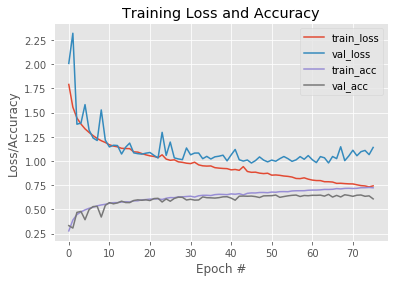

In [73]:
# plot the training loss and accuracy
N = len(history.history["loss"])
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.savefig("my_emotion_plot")
# Is it reasonable? Yes, because train_loss keeps decreaing, train_val keeps increasing, whereas val_loss and val_acc seem to have
# plateaued

Below we attempt to load the model

In [74]:
def create_model(weightsPath):
    # Note that the input shape is 48x48x1
    Rmodel = keras.models.Sequential()
    Rmodel.add(DefaultConv2D(64, kernel_size=7, strides=2,
                            input_shape=[48, 48, 1]))
    Rmodel.add(keras.layers.BatchNormalization())
    Rmodel.add(keras.layers.Activation("relu"))
    Rmodel.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
    prev_filters = 64
    for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
        strides = 1 if filters == prev_filters else 2
        Rmodel.add(ResidualUnit(filters, strides=strides))
        prev_filters = filters
    Rmodel.add(keras.layers.GlobalAvgPool2D())
    Rmodel.add(keras.layers.Flatten())
    Rmodel.add(keras.layers.Dense(7, activation="softmax"))
    Rmodel.load_weights(weightsPath)
    return Rmodel

In [75]:
restoredModel = create_model("models/my_custom_CNN_emotion_model_weights.h5")

In [78]:
restoredModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        3136      
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 12, 12, 64)        74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 12, 12, 64)        74240     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 12, 12, 64)        7

In [79]:
restoredModel.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
score = restoredModel.evaluate(testX1, testY)
score

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.9790992784148042, 0.63806075]

In [80]:
predictions2 = restoredModel.predict(testX1, batch_size=BS)

In [81]:
predictions2 == predictions

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Above is how we can train a custom model. Now, let's try to train a model using transfer learning!

In [108]:
# MobileNets support any input size greater than 32 x 32, with larger image sizes offering better performance.
base_model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 3),
                                               include_top=False,
                                               weights='imagenet')
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(7, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [99]:
# We need 3 channels for MobileNetV2
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(32298, 48, 48, 3)
(3589, 48, 48, 3)
(32298,)
(3589,)


In [107]:
trainX2 = tf.keras.applications.mobilenet_v2.preprocess_input(trainX)
testX2 = tf.keras.applications.mobilenet_v2.preprocess_input(testX)

In [109]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=30, # Early stop if there's no more significant improvement on the val_set for 30 epochs
                                                  restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("models/my_transfer_CNN_emotion_checkpoint.h5", 
                                                verbose=2, 
                                                save_best_only=True,
                                                save_weights_only=True,
                                                monitor='val_accuracy') # save it to my_CNN_emotion_checkpoint.h5. Why save? in case computer crashes

In [110]:
for layer in base_model.layers:
    layer.trainable = False
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history1 = model.fit(aug.flow(trainX2, trainY, batch_size=BS), # fits the model on batches with real-time data augmentation: returns an iterator yielding tuples of (x,y)
                    steps_per_epoch=len(trainX2) // BS, # Number of batches to use for training from the generator in one epoch
                    validation_data=(testX2, testY),
                    validation_steps=len(testX2) // BS, # Number of batches to use for validation in one epoch
                    callbacks=[early_stopping_cb,checkpoint_cb],
                    epochs=EPOCHS)

Train for 1009 steps, validate on 3589 samples
Epoch 1/100000
1007/1009 [============================>.] - ETA: 0s - loss: 17.1464 - accuracy: 0.1942
Epoch 00001: val_accuracy improved from -inf to 0.16267, saving model to models/my_transfer_CNN_emotion_checkpoint.h5
1009/1009 [==============================] - 36s 36ms/step - loss: 17.1306 - accuracy: 0.1942 - val_loss: 8.4727 - val_accuracy: 0.1627
Epoch 2/100000
   1/1009 [..............................] - ETA: 5:10:16WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: 


KeyboardInterrupt: 

In [ ]:
# Now that we have achieved the best we could with the layers froxzen, we will unfreeze the layers and train the entire model
for layer in base_model.layers:
    layer.trainable = True
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
history1 = model.fit(aug.flow(trainX2, trainY, batch_size=BS), # fits the model on batches with real-time data augmentation: returns an iterator yielding tuples of (x,y)
                    steps_per_epoch=len(trainX2) // BS, # Number of batches to use for training from the generator in one epoch
                    validation_data=(testX2, testY),
                    validation_steps=len(testX2) // BS, # Number of batches to use for validation in one epoch
                    callbacks=[early_stopping_cb,checkpoint_cb],
                    epochs=EPOCHS)